In [ ]:
pip install tensorflow

In [4]:
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers import Dense , Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(4 , Activation = 'relu'))
model.add(Dense(4 , Activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer= 'adam' , loss = 'mse')

model.fit(x = x_train , y=y_train ,
          validation_data = (x_test , y_test),
          batch_size = 64 , epochs = 20

          )

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Dense

input_layer = Input((3,))
layer1 = Dense(4 , Activation='relu')(input_layer)
layer2 = Dense(4 , Activation='relu')(layer1)
output_layer1 = Dense(1 )(layer2)

layer3 = Dense(4 , Activation="relu")(layer2)
output_layer2 = Dense(1 , Activation = 'linear')(layer3)

model = Model(input = input_layer , output = output_layer)
model.compile(optimizer = 'adam' , loss='mse')

model.fit(x_train , y_train , validation_data=(x_test , y_test) , epochs = 200 , batch_size = 128)

In [9]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip'

--2025-06-28 08:08:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘CCPP.zip’

CCPP.zip                [   <=>              ]   3.50M  6.59MB/s    in 0.5s    

2025-06-28 08:08:41 (6.59 MB/s) - ‘CCPP.zip’ saved [3674852]



In [14]:
!unzip /content/CCPP.zip

Archive:  /content/CCPP.zip
replace CCPP/Folds5x2_pp.ods? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCPP/Folds5x2_pp.ods    
replace CCPP/Folds5x2_pp.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCPP/Folds5x2_pp.xlsx   
replace CCPP/Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCPP/Readme.txt         
replace CCPP/Readme.txt~? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CCPP/Readme.txt~        


In [16]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.4 MB/s eta 0:00:00


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df = pd.read_excel('/content/CCPP/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [19]:
def get_output(data):
  y1 = data.pop('PE')
  y1 = np.array(y1)
  y2 = data.pop('V')
  y2 = np.array(y2)
  return y1 , y2

In [21]:
train , test = train_test_split(df , test_size=0.2 , random_state = 42)

y_train = get_output(train)
y_test = get_output(test)

mms = MinMaxScaler()

x_train = mms.fit_transform(train)
x_test = mms.transform(test)

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense , Input , Activation

input_layer = Input((3,) , name='input_layer')
layer1 = Dense(10 , activation='relu' , name='layer1')(input_layer)
layer2 = Dense(10 , activation='relu' , name='layer2')(layer1)
output1 = Dense(1 , activation='linear' , name='output1')(layer2)


layer3 = Dense(10 , activation='relu' , name='layer3')(layer2)
output2 = Dense(1 , activation='linear' , name='output2')(layer3)

model = Model(inputs = input_layer , outputs = [output1 , output2])





In [27]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer1 (Dense)      │ (None, 10)        │         40 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer2 (Dense)      │ (None, 10)        │        110 │ layer1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer3 (Dense)      │ (None, 10)        │        110 │ layer2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1 (Dense)     │ (None, 1)         │         11 │ layer2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2 (Dense)     │ (None, 1)         │         11 │ layer3[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam' , loss={'output1' : 'mse' , 'output2' : 'mse'})
model.fit(x_train,y_train,epochs = 200 , batch_size = 128 , validation_data = (x_test , y_test) , verbose= True)

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 209389.4062 - output1_loss: 206258.8750 - output2_loss: 3130.6963 - val_loss: 208882.2812 - val_output1_loss: 205789.4062 - val_output2_loss: 3092.4229
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 208892.5781 - output1_loss: 205841.8750 - output2_loss: 3050.3276 - val_loss: 206906.8125 - val_output1_loss: 203937.3594 - val_output2_loss: 2968.9253
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 206012.2500 - output1_loss: 203115.6094 - output2_loss: 2896.5212 - val_loss: 202284.7188 - val_output1_loss: 199729.4531 - val_output2_loss: 2554.6484
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 200514.0000 - output1_loss: 198169.2188 - output2_loss: 2344.1914 - val_loss: 193377.1875 - val_output1_loss: 191758.0625 - val_output2_loss: 1618.2610
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 190771.0625 - output1_loss: 189485.9375 - output2_loss: 1284.2758 - val_loss: 179776.6719 - val_o

In [32]:
pred = model.predict(x_test)
pred_energy = pred[0]
pred_vacuum = pred[1]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


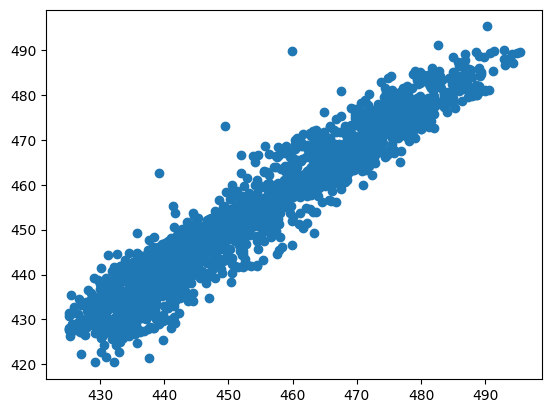

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test[0] , pred_energy)

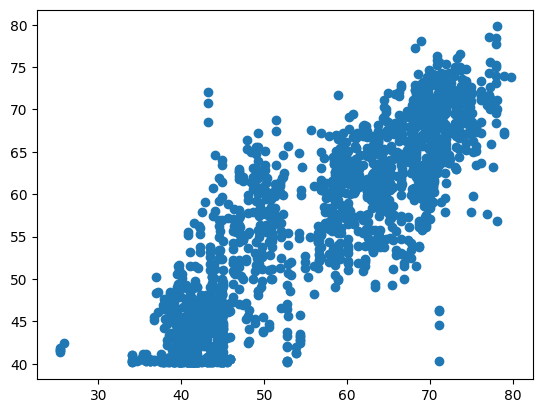

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test[1] , pred_vacuum)

In [38]:
from sklearn.metrics import r2_score
print('r2 score for energy predicted :', r2_score(y_test[0], pred_energy))
print('r2 score forexhaust vacuum predicted :', r2_score(y_test[1], pred_vacuum))

r2 score for energy predicted : 0.9213578897131025
r2 score forexhaust vacuum predicted : 0.7760092710793342
